In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
data_file = 'data/TMDB_all_movies.csv'

df = pd.read_csv(data_file)
df['release_date'] = pd.to_datetime(df['release_date'])

In [7]:
df['popularity'].describe(), df['popularity'].median(), df['popularity'].mode()

(count    904594.000000
 mean          1.796804
 std           8.187837
 min           0.000000
 25%           0.600000
 50%           0.851000
 75%           1.404000
 max        2304.766000
 Name: popularity, dtype: float64,
 0.851,
 0    0.6
 Name: popularity, dtype: float64)

In [38]:
released_df = df[df['status']=='Released']
released_df = released_df[released_df['vote_count']>0]
released_df.dropna(subset='overview', inplace=True)

In [47]:
print("Vote Count\n MEAN: {:.2f}, MODE: {}, MEDIAN: {}".\
      format(released_df['vote_count'].mean(), released_df['vote_count'].mode(), released_df['vote_count'].median()))


Vote Count
 MEAN: 72.38, MODE: 0    1
Name: vote_count, dtype: int64, MEDIAN: 3.0


In [40]:
zero_budget_df = released_df[released_df['budget'] == 0]

In [44]:
zero_budget_df[zero_budget_df['release_date'].dt.year == 2024]['popularity'].describe()

count     737.000000
mean       25.852611
std       153.992131
min         0.000000
25%         1.871000
50%         3.429000
75%         7.647000
max      2304.766000
Name: popularity, dtype: float64

In [50]:
released_df['vote_count'].max(), zero_budget_df['vote_count'].max()

(35369, 10805)

In [51]:
commercial_df = released_df[released_df['budget']>0]

In [54]:
commercial_df[commercial_df['runtime']>0].describe()

,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity
count,2.651600e+04,26516.000000,26516.000000,25988,2.651600e+04,26516.000000,2.651600e+04,26516.000000
mean,3.500045e+05,6.290087,640.369098,2006-04-05 19:52:22.311836416,2.579795e+07,87.042239,1.059941e+07,11.428670
min,5.000000e+00,0.000000,1.000000,1878-05-07 00:00:00,-1.200000e+01,1.000000,1.000000e+00,0.000000
25%,3.168175e+04,5.300000,2.000000,2001-11-17 12:00:00,0.000000e+00,78.000000,2.000000e+04,1.335000
50%,2.255595e+05,6.250000,20.000000,2011-09-08 00:00:00,0.000000e+00,93.000000,1.000000e+06,3.947000
75%,5.879652e+05,7.141250,281.000000,2018-03-09 00:00:00,5.700000e+06,108.000000,8.200000e+06,14.473000
max,1.257352e+06,10.000000,35369.000000,2024-03-08 00:00:00,2.923706e+09,1265.000000,4.600000e+08,1962.814000
std,3.657457e+05,1.855221,2036.198615,NaN,1.015640e+08,41.757695,2.633825e+07,32.027276


In [56]:
1265/60

21.083333333333332

In [61]:
commercial_df['vote_count'].quantile([0.7, 0.8, 0.9, 0.95, 0.99])

0.70      156.0
0.80      464.0
0.90     1535.0
0.95     3376.8
0.99    10275.0
Name: vote_count, dtype: float64

In [62]:
commercial_df[commercial_df['vote_count']>=1535].shape

(2699, 25)

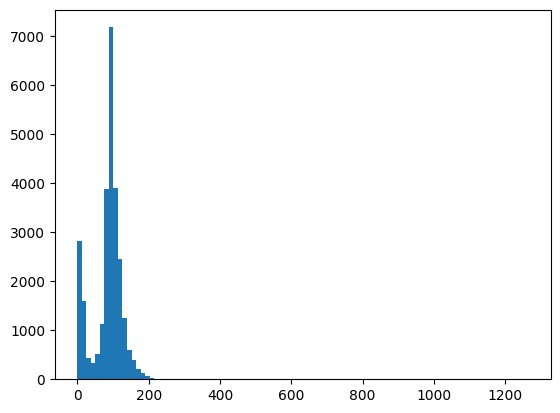

In [55]:
plt.hist(commercial_df['runtime'], bins=100)
plt.show()

In [64]:
commercial_df['runtime'].describe()

count    26973.000000
mean        85.567493
std         42.899366
min          0.000000
25%         75.000000
50%         93.000000
75%        108.000000
max       1265.000000
Name: runtime, dtype: float64

In [66]:
commercial_df['runtime'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

0.1     12.0
0.2     58.0
0.3     82.0
0.4     89.0
0.5     93.0
0.6     98.0
0.7    104.0
0.8    113.0
0.9    127.0
Name: runtime, dtype: float64

In [70]:
commercial_df.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer'],
      dtype='object')

In [76]:
filtered_df = commercial_df.dropna(subset=['cast', 'director', 'genres'])

In [77]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23831 entries, 2 to 898003
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       23831 non-null  int64         
 1   title                    23831 non-null  object        
 2   vote_average             23831 non-null  float64       
 3   vote_count               23831 non-null  int64         
 4   status                   23831 non-null  object        
 5   release_date             23559 non-null  datetime64[ns]
 6   revenue                  23831 non-null  float64       
 7   runtime                  23831 non-null  int64         
 8   budget                   23831 non-null  float64       
 9   imdb_id                  22212 non-null  object        
 10  original_language        23831 non-null  object        
 11  original_title           23831 non-null  object        
 12  overview                 23831 non-n

In [82]:
filtered_df.dropna(subset='producers')['vote_count'].quantile([0.8, 0.85, 0.9, 0.95, 0.99, 0.995])

0.800      693.00
0.850     1102.40
0.900     1815.20
0.950     3636.20
0.990     9811.00
0.995    12694.66
Name: vote_count, dtype: float64

In [85]:
filtered_df['vote_count'].quantile([0.8, 0.85, 0.9])

0.80     439.0
0.85     758.0
0.90    1380.0
Name: vote_count, dtype: float64

In [86]:
temp_df = filtered_df.dropna(subset='producers')
final_df = temp_df[temp_df['vote_count']>1102]

In [100]:
numeric_columns = [column_name for column_name in final_df.columns if final_df[column_name].dtype in (int, float)]
# numeric_columns.insert(0, 'title')
final_num_df = final_df[numeric_columns]
final_num_df.reset_index(inplace=True)

<Axes: >

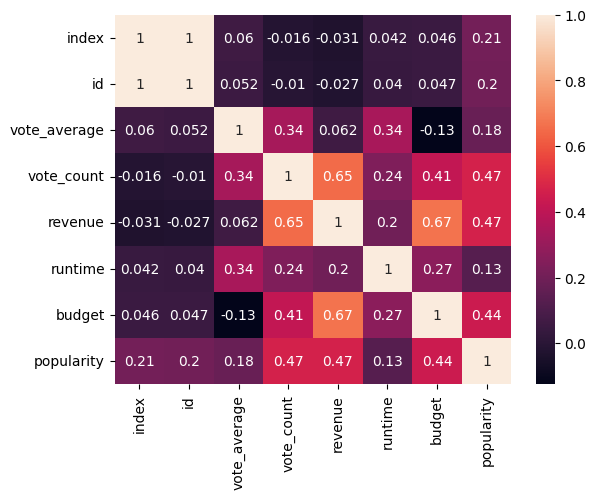

In [103]:
import seaborn as sns
sns.heatmap(final_num_df.corr(), annot=True)

In [105]:
final_df.columns[['id', 'title', 'vote_average', 'vote_count', 'release_date',
       'revenue', 'runtime', 'budget', 'overview', 'tagline', 'genres',
       'production_companies', 'production_countries',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer']]

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'cast', 'director', 'director_of_photography', 'writers', 'producers',
       'music_composer'],
      dtype='object')

In [107]:
final_df['director_of_photography']

2         Guillermo Navarro, Phil Parmet, Rodrigo García...
6                                               Don Burgess
7                                            Conrad L. Hall
9                             Nick Tebbet, Thierry Arbogast
10             Günther Rittau, Karl Freund, Walter Ruttmann
                                ...                        
663553                               Matthias Koenigswieser
669856                                   Haris Zambarloukos
683546                                    Robert Richardson
691034              Jean-Claude Kalache, David Juan Bianchi
712656                                        Aaron McLisky
Name: director_of_photography, Length: 2801, dtype: object